<a href="https://colab.research.google.com/github/rithika1910/BharatanatyamHandGesture_recognition/blob/main/HandGestureRecognition_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

19CSE305 - Machine Learning

# Mudra (Hand Gesture) Recognition 

## Team

1. Rithika Sri J - CB.EN.U4CSE19025  
2. Manav Patnaik  -  CB.EN.U4CSE19033 
3. Mutyala Mohan Chandra  - CB.EN.U4CSE19034  
4. Paila Rohit Reddy  - CB.EN.U4CSE19042  

Dataset: https://drive.google.com/drive/folders/1wACSSV6JJQHdBX2lBTprsfGN-Ii2g_ia?usp=sharing


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
%matplotlib inline

Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploring the Dataset and performing some operations on images

Dataset present at "ML_MUDRA"

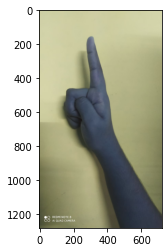

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ML_MUDRA/24_Suchi/1.jpg')
# cv2_imshow(img)
plt.imshow(img)

Although Canny Edge detectors detect more edges than Sobel and Prewitt, most of our images in the dataset require either horizontal or vertical (vertical edges are more), we proceed with Sobel Edge Detection Methods

We apply a Gaussian Blur filter to remove the noise and smoothen the Image

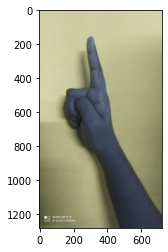

In [ ]:
blurred = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(blurred)

Converting to Greyscale and applying the Sobel Operator


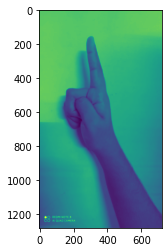

In [ ]:
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

Detecting Vertical edges

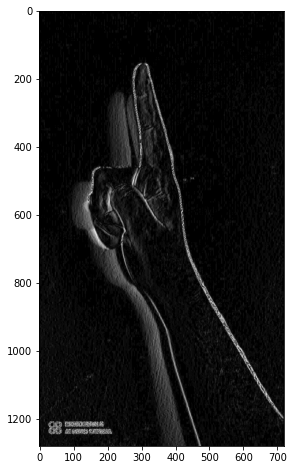

In [ ]:
vert_edges = cv2.Sobel(gray, cv2.CV_16S,1,0,ksize=-1)
final_img = np.uint8(np.absolute(vert_edges))
plt.figure(figsize=(20,8))
plt.imshow(final_img, cmap='gray')

Dilating the image to highlight the edges even more

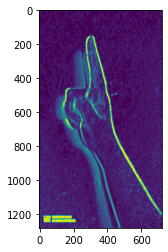

In [ ]:
kernel = np.ones((5,5), np.uint8)

# Dilation
dilated_image = cv2.dilate(final_img, kernel, iterations=1)
plt.imshow(dilated_image)

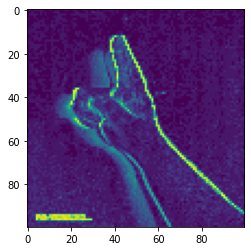

In [ ]:
img = cv2.resize(dilated_image, (100,100))
plt.imshow(img)

In [ ]:
print("Image shape:", img.shape)

Image shape: (100, 100)


Reshaping the image into an array

In [ ]:
img_arr = np.array(img)
img_arr = img_arr.reshape((1,100*100))
img_arr.shape

(1, 10000)

Rebuilding image from the array

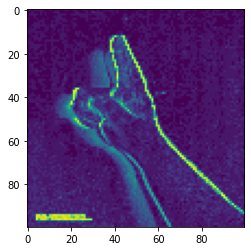

In [ ]:
plt.imshow(img_arr.reshape((100,100)))

# Encompassing all the preprocessing operations into a function.

Function: process_image(image)
Returns: The 1D array after performing 
1. Blurring
2. Greyscale conversion
3. Edge detection
4. Dilation
5. Resizing

Image shape: (100,100)

The array shape: (1, 10000)

In [ ]:
def process_image(image):
  # Blurring
  blurred = cv2.GaussianBlur(image, (5,5), 0)
  
  # Greyscale conversion
  gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
  
  # Edge detection
  vert_edges = cv2.Sobel(gray, cv2.CV_16S,1,0,ksize=-1)
  final_img = np.uint8(np.absolute(vert_edges))


  # Dilation
  kernel = np.ones((5,5), np.uint8)
  dilated_image = cv2.dilate(final_img, kernel, iterations=1)
  
  # Resizing into (100,100)
  img = cv2.resize(dilated_image, (100,100))

  # Converting to array
  img_arr = np.array(img)
  img_arr = img_arr.reshape((1,100*100))

  return img_arr

Performing this for everyother image in the dataset

Storing the arrays and labels in an array of tuples

The tuple: (img_arr, label)

[
  
  ([ ...img_arr1... ], label1) 
  
  ([ ...img_arr2... ], label2)
  
  ...

]

In [ ]:
processed_data = []

In [ ]:
import os

parent_dir = '/content/drive/MyDrive/ML_MUDRA/'
os.chdir(parent_dir)

mudras = os.listdir()

for mudra in mudras:
  label = mudra.split('_')[1]
  for image in os.listdir(mudra):
    img = cv2.imread(f'{parent_dir}{mudra}/{image}')
    img_array = process_image(img)
    data = (img_array, label)
    processed_data.append(data)
    print(data, len(processed_data))

(array([[29, 26, 61, ..., 73, 58, 35]], dtype=uint8), 'Alapadmam') 2
(array([[ 4, 16, 16, ..., 17, 16,  0]], dtype=uint8), 'Alapadmam') 3
(array([[45, 42, 26, ..., 42, 22, 32]], dtype=uint8), 'Alapadmam') 4
(array([[19, 24, 31, ..., 64, 63, 37]], dtype=uint8), 'Alapadmam') 5
(array([[17, 29, 20, ..., 43, 43, 39]], dtype=uint8), 'Alapadmam') 6
(array([[32, 42, 31, ..., 43, 52, 45]], dtype=uint8), 'Alapadmam') 7
(array([[ 0, 16, 16, ..., 16, 16,  0]], dtype=uint8), 'Alapadmam') 8
(array([[ 0, 16, 16, ..., 16, 16,  0]], dtype=uint8), 'Alapadmam') 9
(array([[37, 23, 26, ..., 55, 27, 44]], dtype=uint8), 'Alapadmam') 10
(array([[10, 32, 16, ..., 26, 28, 16]], dtype=uint8), 'Alapadmam') 11
(array([[16, 29, 14, ..., 32, 10, 16]], dtype=uint8), 'Alapadmam') 12
(array([[19, 32, 25, ..., 29, 32, 15]], dtype=uint8), 'Alapadmam') 13
(array([[16, 16, 16, ..., 28, 36, 32]], dtype=uint8), 'Alapadmam') 14
(array([[ 3, 20, 18, ..., 16, 43, 37]], dtype=uint8), 'Alapadmam') 15
(array([[32, 22, 45, ..., 16

In [ ]:
processed_data = np.array(processed_data, dtype=object)
print(processed_data.shape)

(505, 2)


Saving the processed data in a joblib dump file

In [ ]:
from joblib import load, dump

dump(processed_data, 'mudra_processed_data.joblib')

['mudra_processed_data.joblib']

Loading the data back from the dump file

In [ ]:
data = load('mudra_processed_data.joblib')
print(data.shape)

(505, 2)
